[![Google Colab](https://badgen.net/badge/Launch/on%20Google%20Colab/blue?icon=terminal)](https://colab.research.google.com/github/tirthajyoti/Computer_vision/blob/master/Fashion_MNIST_using_CNN.ipynb)

# Improving Computer Vision Accuracy using Convolutions
### Dr. Tirthajyoti Sarkar, Fremont CA 94536
---

This is a notebook made using **[Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb)** where deep learning networks are trained on [Google's GPU cluster](https://cloud.google.com/gpu/).

## What are we doing?

In this notebook, we will first see how to do fashion image recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. 

We will use a dataset called '[Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)' as it consists of small images (28 pixels x 28 pixles) of fashion items, much in the same spirit as that of the [original famous MNIST dataset](http://yann.lecun.com/exdb/mnist/).

We can experiment with the impact of different sized of hidden layer, number of training epochs etc on the final accuracy.

After that, we will introduce [convolutional and pooling layers](http://cs231n.github.io/convolutional-networks/) and see their impact on the image classification task.

![alt text](http://cs231n.github.io/assets/nn1/neural_net2.jpeg)

![alt text](http://cs231n.github.io/assets/cnn/cnn.jpeg)

We will keep track of wall clock time using the **`time.time()`** function

## First, we use simple densely connected neural net

In [ ]:
from time import time
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

### Load the dataset

In [ ]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

### Show few images

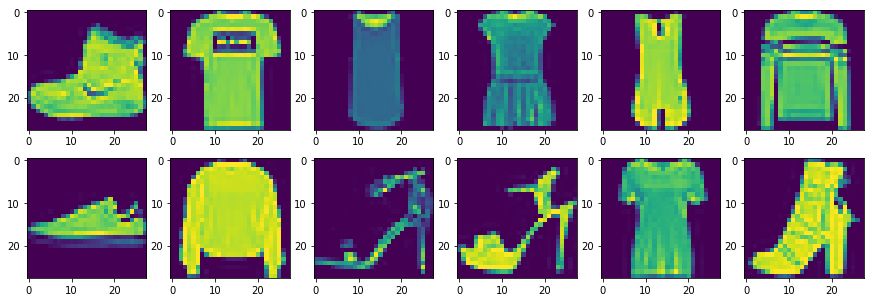

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=6,figsize=(15,5))
ax = axes.ravel()
for i in range(12):
  ax[i].imshow(training_images[i].reshape(28,28))
  
plt.show()

### Reshaping the images for feeding into the neural net

In [ ]:
training_images=training_images / 255.0
test_images=test_images / 255.0

### Keras model definition

In [5]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0703 03:03:41.810330 139679994218368 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Compile the model

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Train the model

In [9]:
t1=time()
model.fit(training_images, training_labels, epochs=10)
t2=time()

Epoch 1/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4856 - acc: 0.8274
Epoch 2/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3642 - acc: 0.8678
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3274 - acc: 0.8804
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.3064 - acc: 0.8865
Epoch 5/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2853 - acc: 0.8939
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2716 - acc: 0.8993
Epoch 7/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2577 - acc: 0.9037
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2474 - acc: 0.9072
Epoch 9/10
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2382 - acc: 0.9103
Epoch 10/10
60000/60000 [==============================] - 6s 98us/sample - loss:

### Print the time taken for training

In [10]:
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))


Training wall clock time: 60.275 seconds



### Compute accuracy of the model on the test/validation set

In [11]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

10000/10000 [==============================] - 1s 67us/sample - loss: 0.3636 - acc: 0.8763

Test accuracy:  0.8763


Your accuracy is probably about 89% on training and 87% on validation...not bad...But how do you make that even better? One way is to use something called Convolutions. I'm not going to details on Convolutions here, but the ultimate concept is that they narrow down the content of the image to focus on specific, distinct, details. 

If you've ever done image processing using a filter (like this: https://en.wikipedia.org/wiki/Kernel_(image_processing)) then convolutions will look very familiar.

In short, **you take an array (usually 3x3 or 5x5) and pass it over the image**. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection. So, for example, if you look at the above link, you'll see a 3x3 that is defined for edge detection where the middle cell is 8, and all of its neighbors are -1. In this case, for each pixel, you would multiply its value by 8, then subtract the value of each neighbor. Do this for every pixel, and you'll end up with a new image that has the edges enhanced.

This is perfect for computer vision, because often** it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less**...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

## Adding convolution and pooling layers
Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [ ]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

In [ ]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [28]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [29]:
t1=time()
history=model2.fit(training_images, training_labels, epochs=5)
t2=time()

Epoch 1/5
60000/60000 [==============================] - 19s 322us/sample - loss: 0.1176 - acc: 0.9634
Epoch 2/5
60000/60000 [==============================] - 19s 323us/sample - loss: 0.0381 - acc: 0.9881
Epoch 3/5
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0264 - acc: 0.9914
Epoch 4/5
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0187 - acc: 0.9939
Epoch 5/5
60000/60000 [==============================] - 18s 296us/sample - loss: 0.0154 - acc: 0.9951


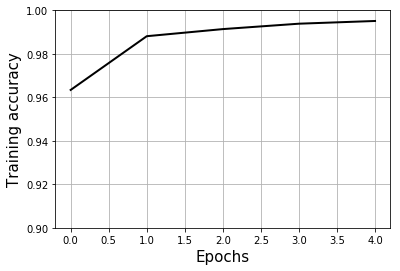

In [34]:
plt.plot(history.history['acc'],c='k',lw=2)
plt.grid(True)
plt.xlabel("Epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.ylim(0.9,1.0)
plt.show()

In [32]:
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))



Training wall clock time: 93.696 seconds



In [33]:
test_loss = model.evaluate(test_images, test_labels)
print("\nTest accuracy: ",test_loss[1])

10000/10000 [==============================] - 1s 109us/sample - loss: 0.0503 - acc: 0.9846

Test accuracy:  0.9846


## How was the code organized anyway?

Then, look at the code again, and see, step by step how the Convolutions were built:

Step 1 is to gather the data. You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape. 

```
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```

Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2. The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. In the first layer, the shape of the input data.

You'll follow the Convolution with a MaxPooling layer which is then designed to compress the image, while maintaining the content of the features that were highlighted by the convlution. By specifying (2,2) for the MaxPooling, the effect is to quarter the size of the image. Without going into too much detail here, the idea is that it creates a 2x2 array of pixels, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively reducing the image by 25%.

You can call model.summary() to see the size and shape of the network, and you'll notice that after every MaxPooling layer, the image size is reduced in this way. 


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```



Add another convolution



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```



Now flatten the output. After this you'll just have the same DNN structure as the non convolutional version

```
  tf.keras.layers.Flatten(),
```



The same 128 dense layers, and 10 output layers as in the pre-convolution example:



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```



Now compile the model, call the fit method to do the training, and evaluate the loss and accuracy from the test set.



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```




## EXERCISES

1. Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.

2. Remove the final Convolution. What impact will this have on accuracy or training time?

3. How about adding more Convolutions? What impact do you think this will have? Experiment with it.

4. Remove all Convolutions but the first. What impact do you think this will have? Experiment with it. 

5. In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here!

### Only a single convolutional layer

In [21]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

1.14.0
11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [===================

### Three (3) convolutional layers

In [22]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

t1=time()
model.fit(training_images, training_labels, epochs=5)
t2=time()
print("\nTraining wall clock time: {} seconds\n".format(round(t2-t1,3)))

test_loss, test_acc = model.evaluate(test_images, test_labels)

print("\nTest accuracy: ",test_acc)

1.14.0
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)        